In [22]:
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# data import
data = Path('resources/airline.csv')
df = pd.read_csv(data)
df.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer                           129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi                      129880 non-null  int64  
 7   Departure/Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_time_convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease_of_Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate_location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food_and_drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [9]:
# find all null values
df.isnull().sum()

Gender                                 0
Customer                               0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi                          0
Departure/Arrival_time_convenient      0
Ease_of_Online booking                 0
Gate_location                          0
Food_and_drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

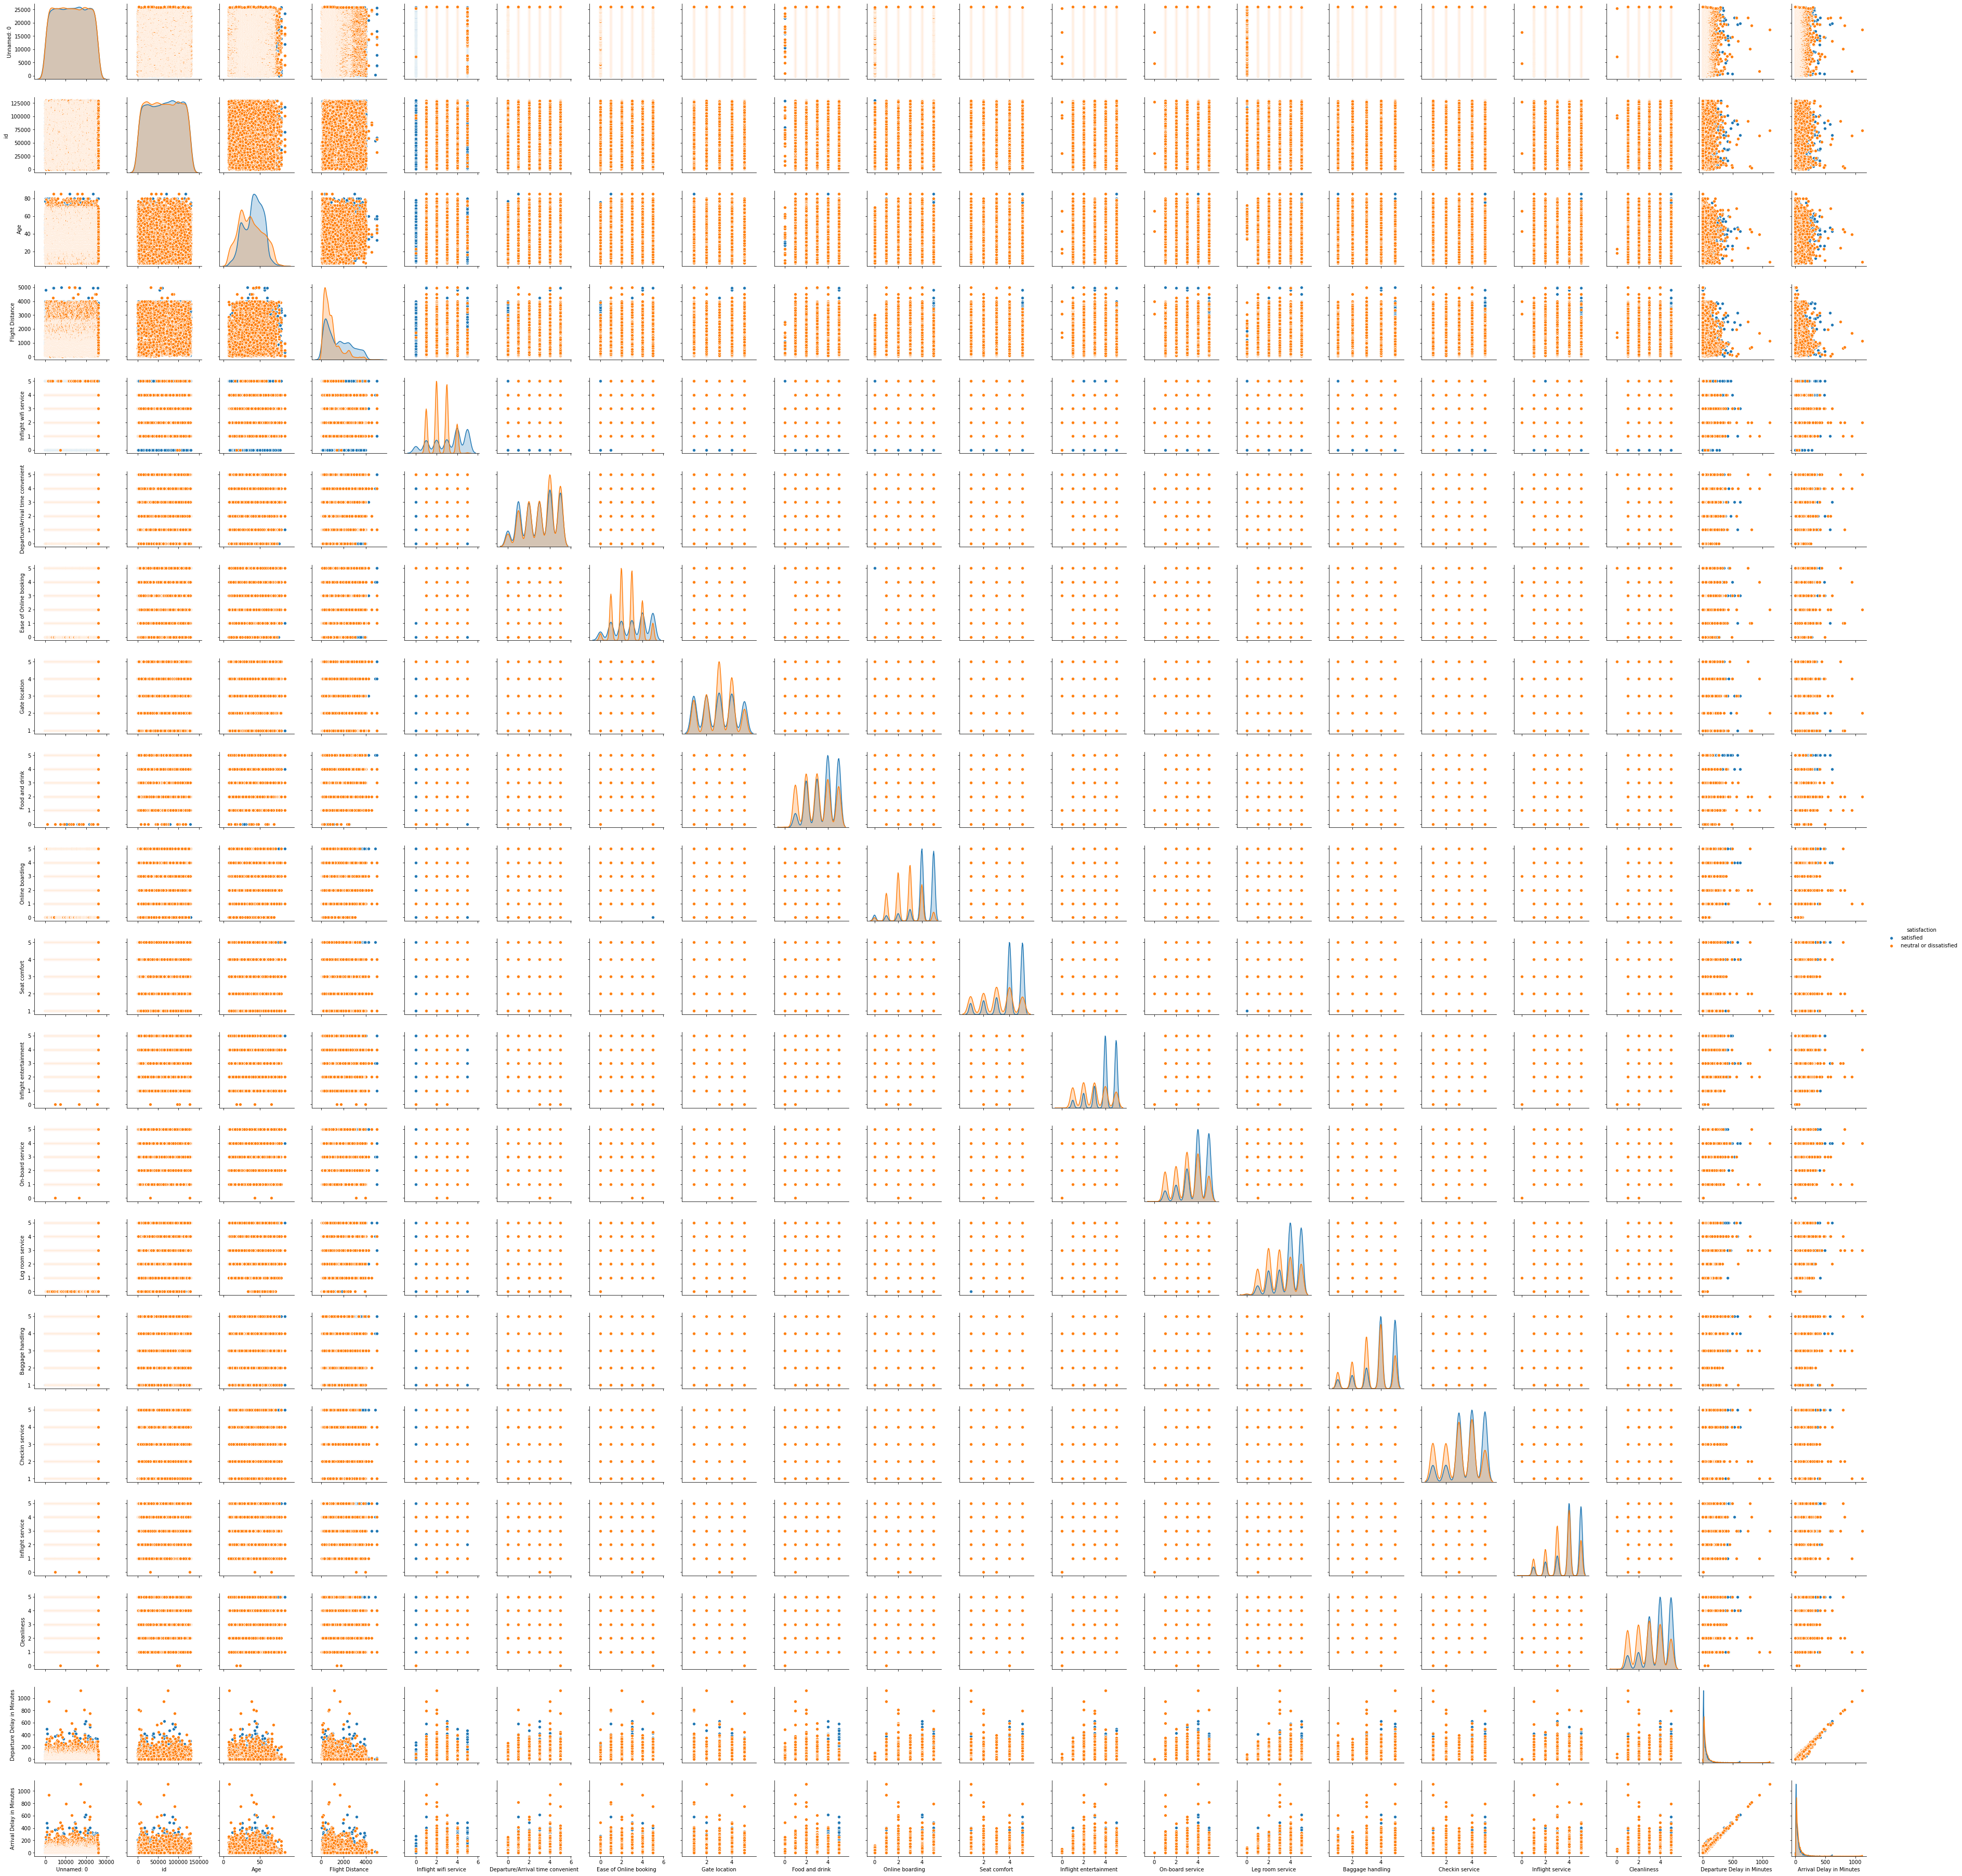

In [6]:
sns.pairplot(df, hue="satisfaction")
plt.show()

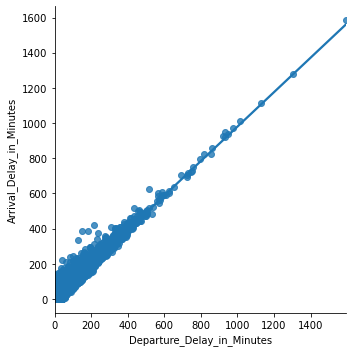

In [11]:
sns.lmplot(x='Departure_Delay_in_Minutes',y='Arrival_Delay_in_Minutes',data=df)

Arrival Delay and Departure delay have a linear relation, so we can drop one colum

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import scipy as sp

categorical_columns = ['Gender', 'Customer', 'Type_of_Travel', 'Class']
numerical_columns = ['Age','Flight Distance','Inflight wifi',
                     'Departure/Arrival_time_convenient','Ease_of_Online booking',
                     'Gate_location','Food_and_drink','Online boarding',
                     'Seat comfort','Inflight entertainment','On-board service',
                     'Leg room service','Baggage handling','Checkin service',
                     'Inflight service','Cleanliness','Departure_Delay_in_Minutes',
                     'Arrival_Delay_in_Minutes']

df2 = df.copy()
bin_encoded_df = pd.get_dummies(df, columns=['Gender','Customer', 'Type_of_Travel', 'Class'])
bin_encoded_df.head()

,Customer,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,...,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Gender_Male,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,Loyal Customer,13,460,3,4,3,1,5,3,5,...,25,18.0,neutral or dissatisfied,0,1,0,1,0,0,1
1,disloyal Customer,25,235,3,2,3,3,1,3,1,...,1,6.0,neutral or dissatisfied,0,1,1,0,1,0,0
2,Loyal Customer,26,1142,2,2,2,2,5,5,5,...,0,0.0,satisfied,1,0,1,0,1,0,0
3,Loyal Customer,25,562,2,5,5,5,2,2,2,...,11,9.0,neutral or dissatisfied,1,0,1,0,1,0,0
4,Loyal Customer,61,214,3,3,3,3,4,5,5,...,0,0.0,satisfied,0,1,1,0,1,0,0


In [45]:
# drop unessessary columns and define the features set.
X = bin_encoded_df.drop(columns=['Unnamed: 0', 'id', 'Arrival Delay in Minutes','satisfaction'])

X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,50,1,0,1,0,1,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,0,1,0,1,0,1,0,1,0,0
2,20,192,2,0,2,4,2,2,2,2,...,0,0,1,0,1,1,0,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,0,0,1,1,0,1,0,1,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,0,1,0,1,0,1,0,0,1,0


In [46]:
# Create target
y_sel = bin_encoded_df["satisfaction"]
#Encode text labels into numerical values
y_encoded = pd.get_dummies(y_sel, columns=["satisfaction"])
y = y_encoded["satisfied"].ravel()
y[:5]

array([1, 1, 0, 1, 1], dtype=uint8)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [48]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [49]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 0.5540974 ,  1.32565108,  0.95945526, ...,  1.04033655,
        -0.89706433, -0.28240737],
       [ 0.48812786, -1.03593408, -0.54487916, ...,  1.04033655,
        -0.89706433, -0.28240737],
       [-0.63335431,  0.62377437,  0.20728805, ...,  1.04033655,
        -0.89706433, -0.28240737],
       ...,
       [ 1.2137928 , -0.65000188,  0.95945526, ..., -0.96122741,
        -0.89706433,  3.54098411],
       [ 0.75200602, -0.27706739,  0.20728805, ..., -0.96122741,
         1.11474726, -0.28240737],
       [-0.83126293, -1.12091916, -0.54487916, ...,  1.04033655,
        -0.89706433, -0.28240737]])

In [50]:
# create a random forest instance using the random forest classifier, RandomForestClassifier()
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [51]:
# Make Predictions Using the Testing Data
predictions = rf_model.predict(X_test_scaled)

In [52]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,3499,120
Actual 1,193,2682


In [53]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3499,120
Actual 1,193,2682


Accuracy Score : 0.9518016630736064
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3619
           1       0.96      0.93      0.94      2875

    accuracy                           0.95      6494
   macro avg       0.95      0.95      0.95      6494
weighted avg       0.95      0.95      0.95      6494



In [54]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.15328121549943347, 'Online boarding'),
 (0.13458586329874503, 'Inflight wifi service'),
 (0.06995444591865949, 'Class_Business'),
 (0.06528097451507964, 'Type of Travel_Personal Travel'),
 (0.06277478036488561, 'Type of Travel_Business travel'),
 (0.05949278905204746, 'Inflight entertainment'),
 (0.044591945543773465, 'Seat comfort'),
 (0.035923985839768316, 'Ease of Online booking'),
 (0.0343331783800903, 'Leg room service'),
 (0.03171575963271015, 'Class_Eco'),
 (0.0313264204802606, 'Flight Distance'),
 (0.029305709284134156, 'Age'),
 (0.02925381664819375, 'Cleanliness'),
 (0.02784956880898318, 'Customer Type_Loyal Customer'),
 (0.027752993352801163, 'Checkin service'),
 (0.026719973418152482, 'Customer Type_disloyal Customer'),
 (0.025908398752771206, 'Inflight service'),
 (0.024574737420463174, 'On-board service'),
 (0.022783800419522392, 'Baggage handling'),
 (0.014422124932860327, 'Gate location'),
 (0.014061644343811625, 'Departure Delay in Minutes'),
 (0.013157198754546287,

### Sampling 
remove low important features, 'Gender_Male', 'Gender_Female', 'Class_Eco Plus'

In [60]:
X = bin_encoded_df.drop(columns=['Unnamed: 0', 'id', 'Arrival Delay in Minutes','satisfaction','Gender_Male', 'Gender_Female', 'Class_Eco Plus'])

X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco
0,52,160,5,4,3,4,3,4,3,5,...,2,5,5,50,1,0,1,0,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,3,4,5,0,1,0,1,0,1,0
2,20,192,2,0,2,4,2,2,2,2,...,2,2,2,0,0,1,1,0,0,1
3,44,3377,0,0,0,2,3,4,4,1,...,3,1,4,0,1,0,1,0,1,0
4,49,1182,2,3,4,3,4,1,2,2,...,4,2,4,0,1,0,1,0,0,1


In [61]:
y[:5]

array([1, 1, 0, 1, 1], dtype=uint8)

In [62]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [63]:
# create a random forest instance using the random forest classifier, RandomForestClassifier()
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


# Make Predictions Using the Testing Data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df
print(cm_df)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

          Predicted 0  Predicted 1
Actual 0         3510          109
Actual 1          193         2682
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3510,109
Actual 1,193,2682


Accuracy Score : 0.9534955343393902
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3619
           1       0.96      0.93      0.95      2875

    accuracy                           0.95      6494
   macro avg       0.95      0.95      0.95      6494
weighted avg       0.95      0.95      0.95      6494



## Ensemble Learning
The concept of ensemble learning is the process of combining multiple models, like decision tree algorithms, to help improve the accuracy and robustness, as well as decrease variance of the model, and therefore increase the overall performance of the model

In [64]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco
0,52,160,5,4,3,4,3,4,3,5,...,2,5,5,50,1,0,1,0,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,3,4,5,0,1,0,1,0,1,0
2,20,192,2,0,2,4,2,2,2,2,...,2,2,2,0,0,1,1,0,0,1
3,44,3377,0,0,0,2,3,4,4,1,...,3,1,4,0,1,0,1,0,1,0
4,49,1182,2,3,4,3,4,1,2,2,...,4,2,4,0,1,0,1,0,0,1


In [65]:
y[:5]

array([1, 1, 0, 1, 1], dtype=uint8)

In [66]:
# split the dataset into training and testing sets. the random_state argument is optional.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [67]:
# scale the data, for comparing the performances of different models.
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# a for loop is used to identify the learning rate that yields the best performance.
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.2, 0.35, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model using classifier.score() , which yields the same result with Scikit-learn's accuracy_score module.
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.898
Accuracy score (validation): 0.899

Learning rate:  0.1
Accuracy score (training): 0.914
Accuracy score (validation): 0.917

Learning rate:  0.2
Accuracy score (training): 0.931
Accuracy score (validation): 0.931

Learning rate:  0.35
Accuracy score (training): 0.935
Accuracy score (validation): 0.934

Learning rate:  0.5
Accuracy score (training): 0.940
Accuracy score (validation): 0.938

Learning rate:  0.75
Accuracy score (training): 0.940
Accuracy score (validation): 0.933

Learning rate:  1
Accuracy score (training): 0.945
Accuracy score (validation): 0.938



In [68]:
# learning_rate value obtained from the for loop, we instantiate a model, train it, then create predictions.
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,1
7,0,0
8,1,1
9,0,0


In [69]:
# assess the model's performance

acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9402525408068987


In [70]:
# generate a confusion_matrix of the results.
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
cm, index=["Actual 0", "Actual 1"],
columns=["Predicted 0", "Predicted 1"]
)
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,3535,153
Actual 1,235,2571


In [71]:
# generate a classification report to evaluate the precision, recall, and F1 scores.
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3688
           1       0.94      0.92      0.93      2806

    accuracy                           0.94      6494
   macro avg       0.94      0.94      0.94      6494
weighted avg       0.94      0.94      0.94      6494



In [68]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import scipy as sp

categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_columns = ['Age','Flight Distance','Inflight wifi service',
                     'Departure/Arrival time convenient','Ease of Online booking',
                     'Gate location','Food and drink','Online boarding',
                     'Seat comfort','Inflight entertainment','On-board service',
                     'Leg room service','Baggage handling','Checkin service',
                     'Inflight service','Cleanliness','Departure Delay in Minutes',
                     'Arrival Delay in Minutes']

encoded_df = pd.get_dummies(loans_df, columns=["education", "gender"])
encoded_df.head()

In [ ]:
y_encoded = pd.get_dummies(y, columns=["satisfaction"])
y_encoded.head()

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)



In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

C:\Users\jeja9\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jeja9\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jeja9\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


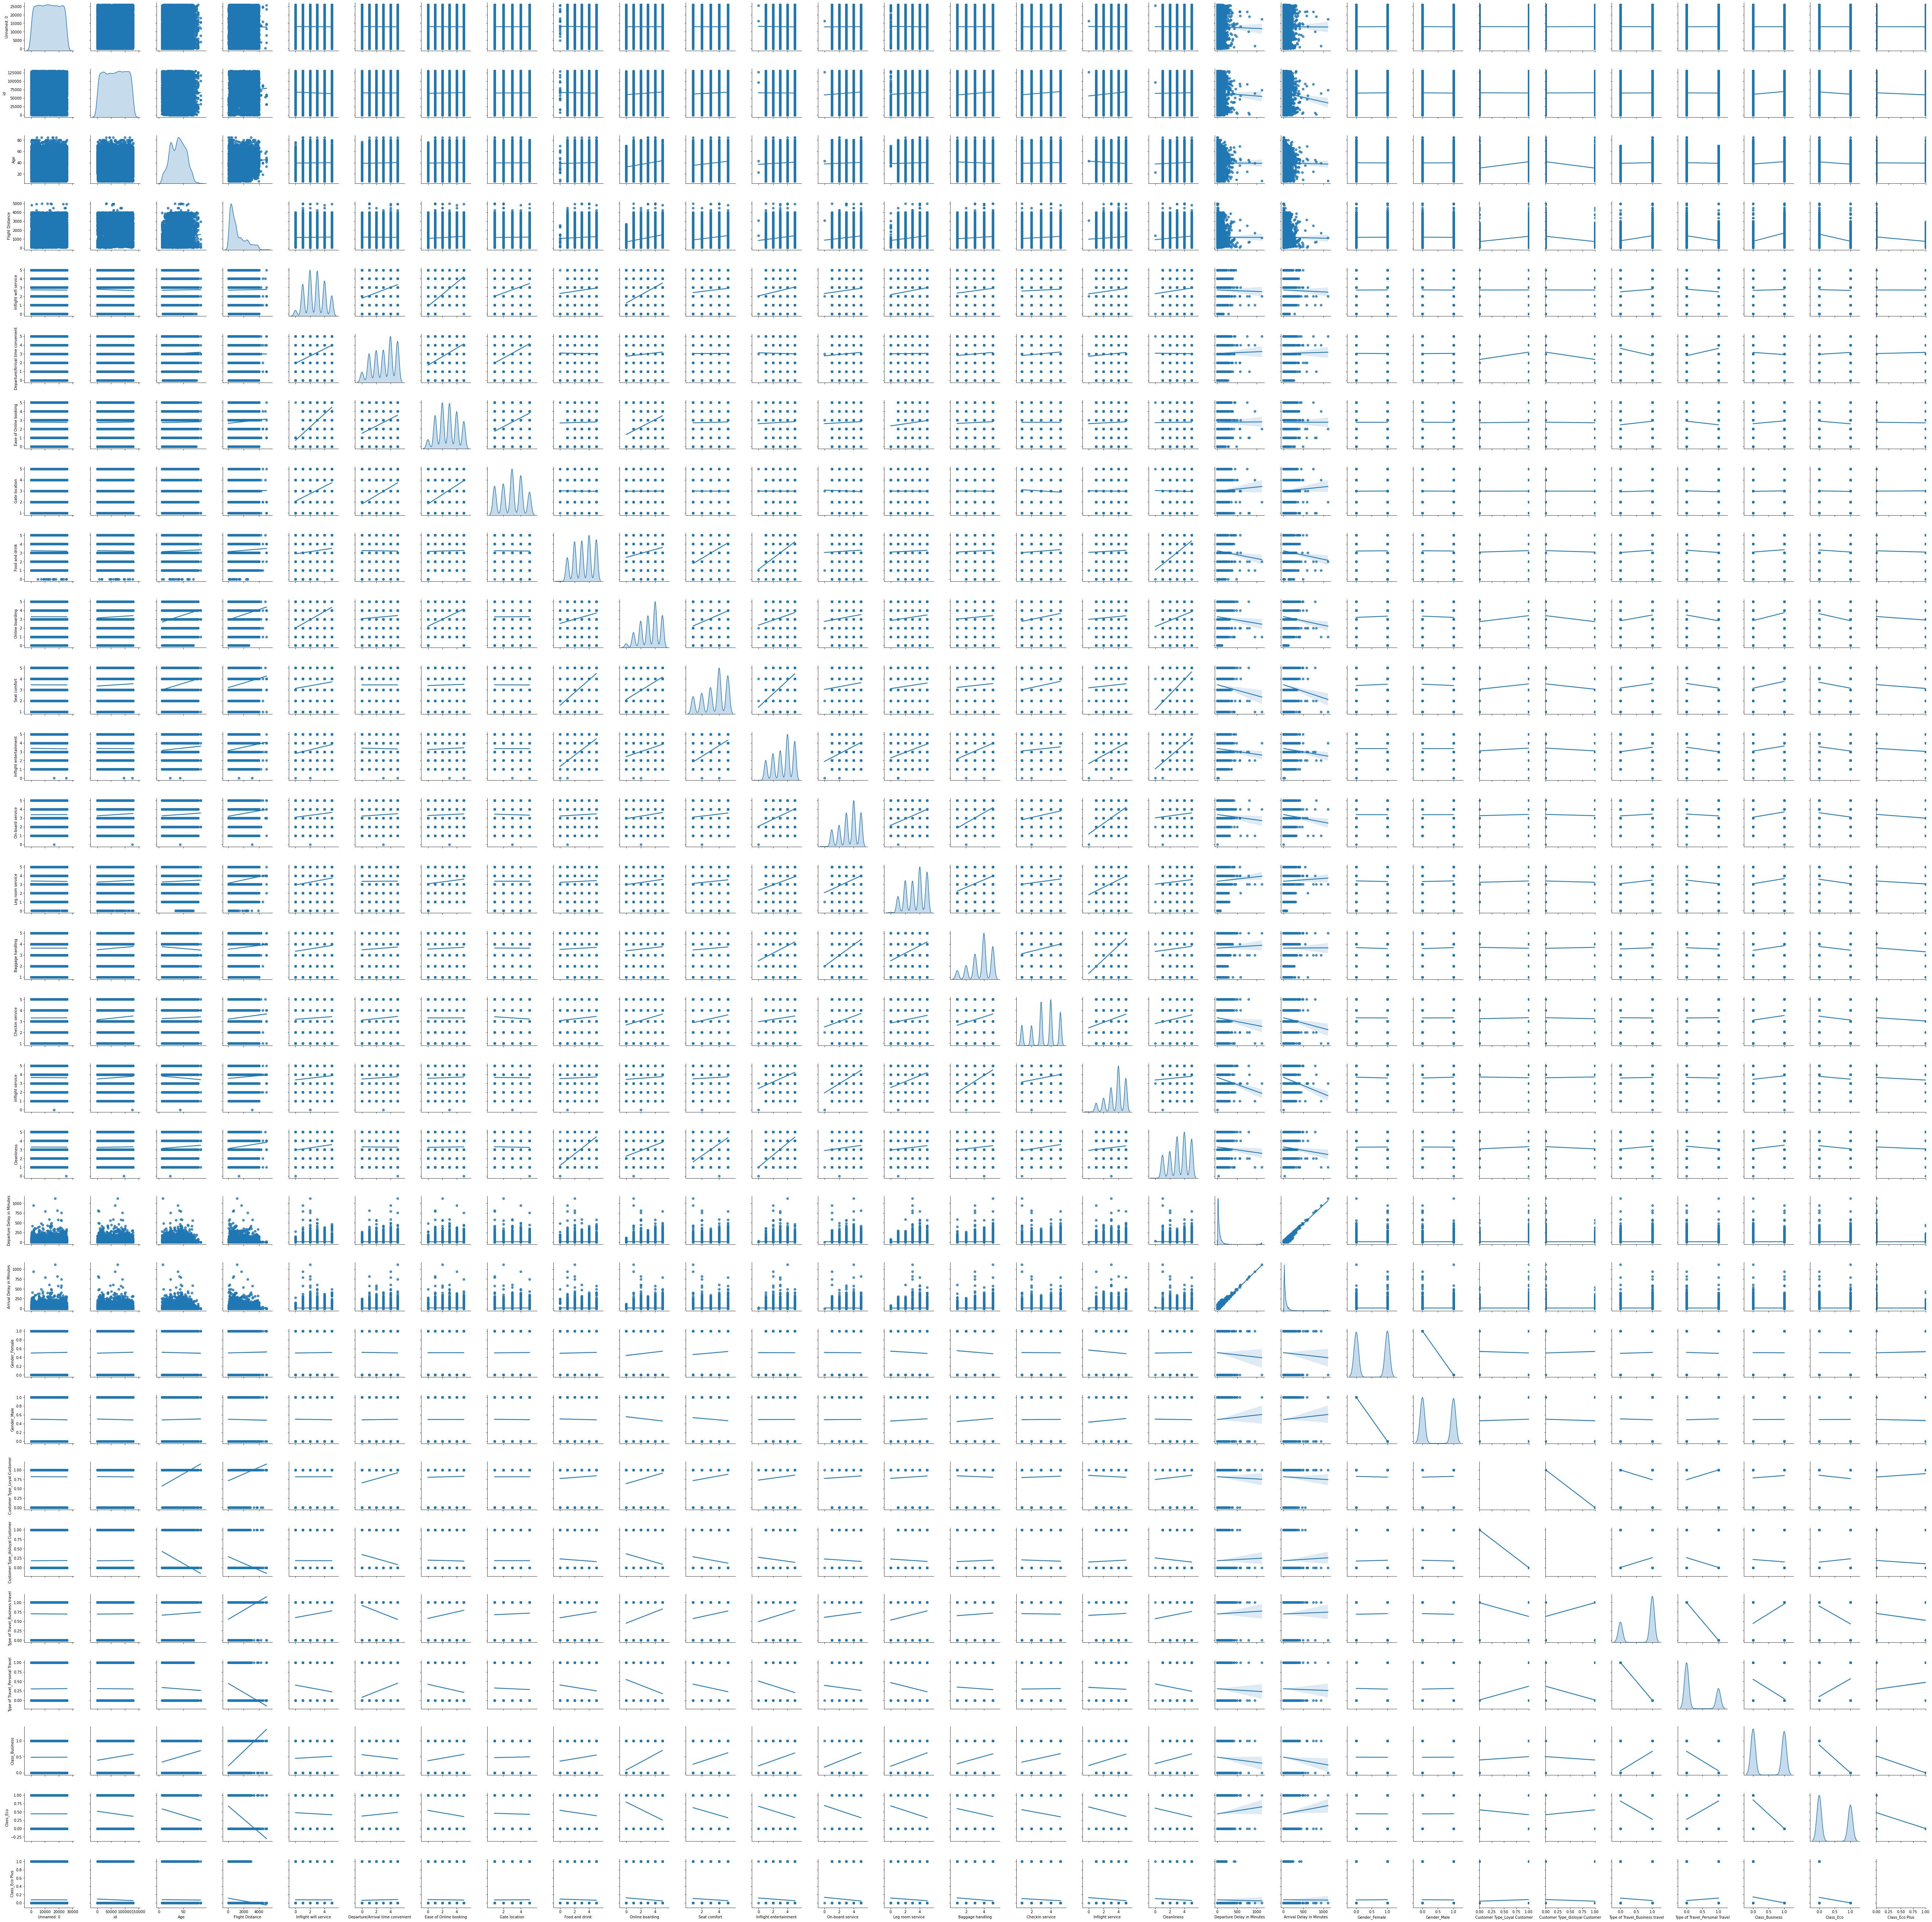

In [41]:
train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Flight Distance                    25976 non-null  int64  
 4   Inflight wifi service              25976 non-null  int64  
 5   Departure/Arrival time convenient  25976 non-null  int64  
 6   Ease of Online booking             25976 non-null  int64  
 7   Gate location                      25976 non-null  int64  
 8   Food and drink                     25976 non-null  int64  
 9   Online boarding                    25976 non-null  int64  
 10  Seat comfort                       25976 non-null  int64  
 11  Inflight entertainment             25976 non-null  int

### Ensemble Learning
The concept of ensemble learning is the process of combining multiple models, like decision tree algorithms, to help improve the accuracy and robustness, as well as decrease variance of the model, and therefore increase the overall performance of the model